In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [19]:
results = pd.read_csv("/home/batman/code/fifteen-puzzle/data/experiments/chaotic-generator-heuristic-benchmark.csv")
results.shape

(712, 9)

In [20]:
results.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION
0,2019-03-17 18:07:44.223874 PID4361,1,A*,PDB[Pat:5],ChaoticSHF[MaxCnt:1500],0.268062,41,1798,35.000000
1,2019-03-17 18:07:44.247481 PID4370,1,A*,PDB[Pat:5],ChaoticSHF[MaxCnt:1500],1.867945,35,10776,25.000000
2,2019-03-17 18:07:44.261788 PID4374,1,A*,PDB[Pat:5],ChaoticSHF[MaxCnt:1500],6.476680,45,34062,37.000000
3,2019-03-17 18:07:44.215227 PID4359,1,A*,PDB[Pat:5],ChaoticSHF[MaxCnt:1500],7.567029,46,35489,36.000000
4,2019-03-17 18:07:44.223874 PID4361,1,A*,ANN[Const:0],ChaoticSHF[MaxCnt:1500],1.393123,41,275,43.852619


In [21]:
ann_results = results[results.HEURISTIC_NAME == "ANN[Const:0]"]
ann_results.shape

(349, 9)

In [22]:
pdb_results = results[results.HEURISTIC_NAME == "PDB[Pat:5]"]
pdb_results.shape

(363, 9)

In [23]:
def optimal_cost(row):
    process_id = row["PROCESS_ID"]
    board_id = row["BOARD_ID"]
    
    pdb_row_df = pdb_results[(pdb_results.PROCESS_ID == process_id) & (pdb_results.BOARD_ID == board_id)]
    return pdb_row_df.iloc[0]["SOLUTION_COST"]

In [24]:
results_complete = results.copy()

results_complete["OPTIMAL_SOLUTION_COST"] = results_complete.apply(lambda row: optimal_cost(row), axis=1)
results_complete["SOLUTION_COST_ERROR"] = results_complete["SOLUTION_COST"] - results_complete["OPTIMAL_SOLUTION_COST"]
results_complete["INITIAL_HEURISTIC_PREDICTION_ERROR"] = results_complete["INITIAL_HEURISTIC_PREDICTION"] - results_complete["OPTIMAL_SOLUTION_COST"]

In [25]:
results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
0,2019-03-17 18:07:44.223874 PID4361,1,A*,PDB[Pat:5],ChaoticSHF[MaxCnt:1500],0.268062,41,1798,35.000000,41,0,-6.000000
1,2019-03-17 18:07:44.247481 PID4370,1,A*,PDB[Pat:5],ChaoticSHF[MaxCnt:1500],1.867945,35,10776,25.000000,35,0,-10.000000
2,2019-03-17 18:07:44.261788 PID4374,1,A*,PDB[Pat:5],ChaoticSHF[MaxCnt:1500],6.476680,45,34062,37.000000,45,0,-8.000000
3,2019-03-17 18:07:44.215227 PID4359,1,A*,PDB[Pat:5],ChaoticSHF[MaxCnt:1500],7.567029,46,35489,36.000000,46,0,-10.000000
4,2019-03-17 18:07:44.223874 PID4361,1,A*,ANN[Const:0],ChaoticSHF[MaxCnt:1500],1.393123,41,275,43.852619,41,0,2.852619


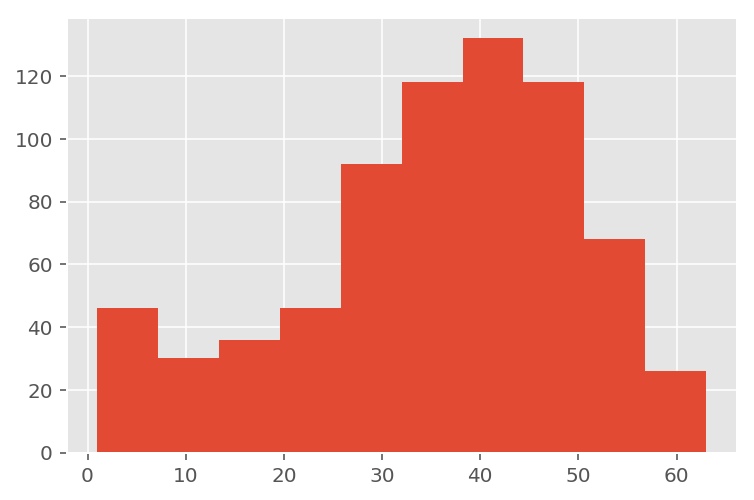

In [26]:
plt.hist(results_complete["OPTIMAL_SOLUTION_COST"]);

In [27]:
ann_results_complete = results_complete[results_complete.HEURISTIC_NAME == "ANN[Const:0]"]
pdb_results_complete = results_complete[results_complete.HEURISTIC_NAME == "ANN[Const:0]"]

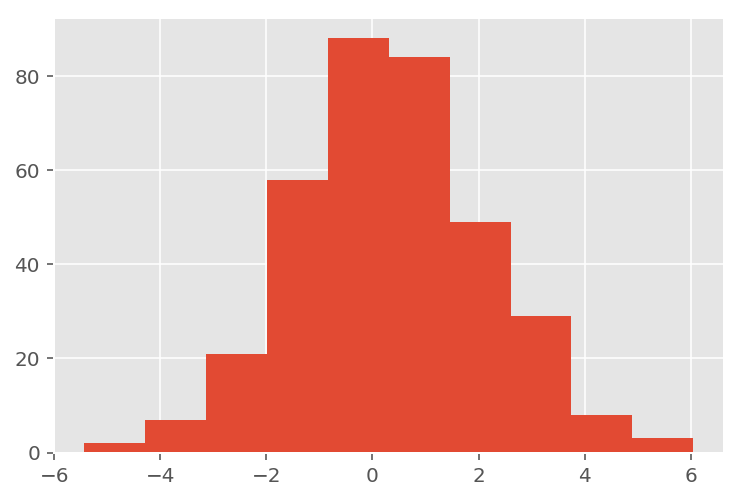

In [28]:
plt.hist(ann_results_complete["INITIAL_HEURISTIC_PREDICTION_ERROR"]);

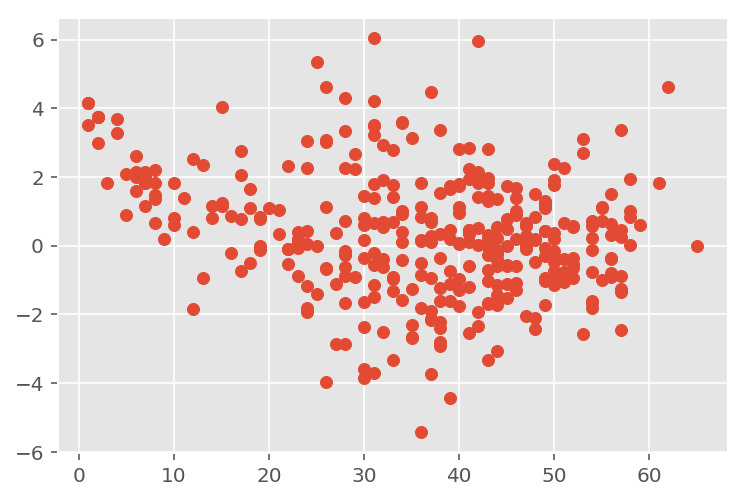

In [29]:
plt.scatter(ann_results_complete["SOLUTION_COST"], ann_results_complete["INITIAL_HEURISTIC_PREDICTION_ERROR"]);

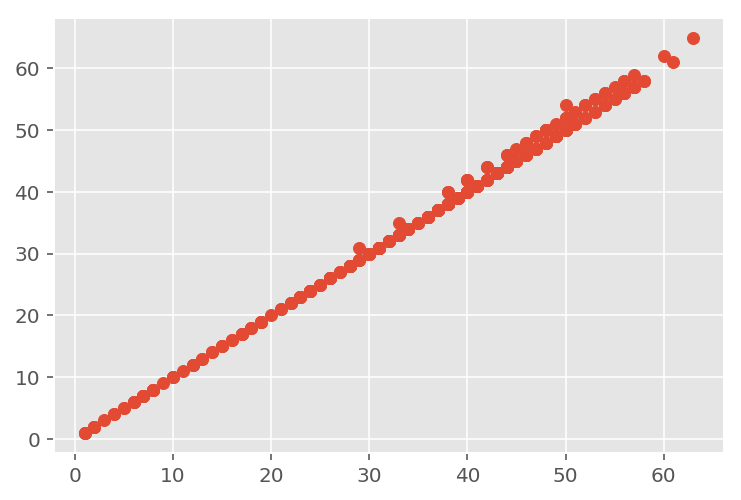

In [31]:
plt.scatter(ann_results_complete["OPTIMAL_SOLUTION_COST"], ann_results_complete["SOLUTION_COST"]);